In [ ]:
from transformers import ViTFeatureExtractor, TFViTForImageClassification
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
img=[Image.open('BSDS_242078.jpg'),Image.open('BSDS_361010.jpg'),Image.open('BSDS_376001.jpg')]

feature_extractor=ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model=TFViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs=feature_extractor(img,return_tensors='tf')
res=model(**inputs)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFViTForImageClassification.

All the weights of TFViTForImageClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTForImageClassification for predictions without further training.


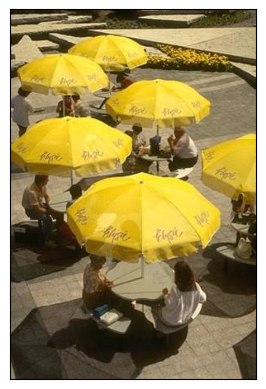

0 번째 영상의 1순위 부류:  umbrella 98.75840759277344


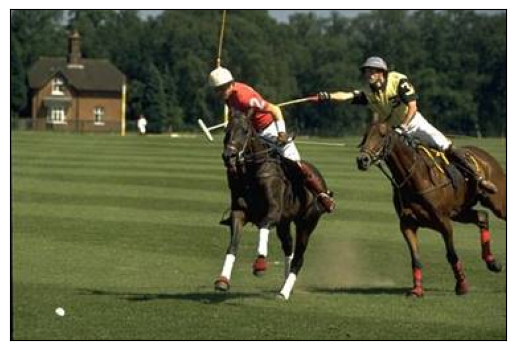

1 번째 영상의 1순위 부류:  croquet ball 3.895781993865967


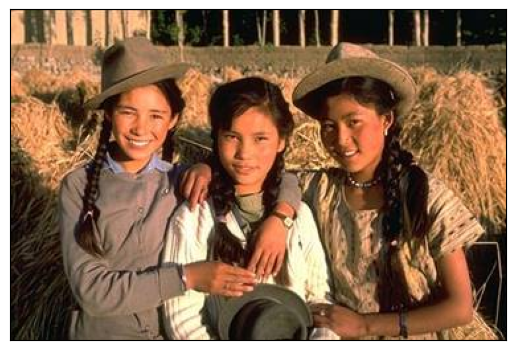

2 번째 영상의 1순위 부류:  hay 18.506315231323242


In [ ]:
for i in range(res.logits.shape[0]):
    plt.imshow(img[i]); plt.xticks([]); plt.yticks([]); plt.show()
    predicted_label=int(tf.math.argmax(res.logits[i],axis=-1))
    prob=float(tf.nn.softmax(res.logits[i])[predicted_label]*100.0)
    print(i,'번째 영상의 1순위 부류: ',model.config.id2label[predicted_label],prob)